In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64,name='layer_1'),
    Dense(32),
    Dense(16),
    Dense(10,activation='softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.weights[0].shape

TensorShape([784, 64])

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(32,kernel_size=3,strides=2,input_shape=(28,28,1)),
    MaxPooling2D(3),
    Flatten(),
    Dense(10,activation='softmax',name='last')
])

In [8]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
last (Dense)                 (None, 10)                5130      
Total params: 5,450
Trainable params: 5,450
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy','mae'],optimizer='sgd')

In [10]:
# Print the resulting model attributes

print(model.optimizer.lr)
model.metrics

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
# Print the shape of the training data

train_images.shape , test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [15]:
max([max(i) for i in train_images[0]])

255

In [16]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.
test_images = test_images/255.

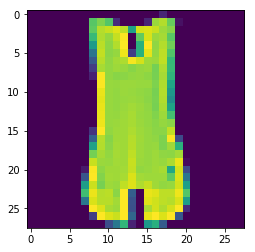

T-shirt/top


In [17]:
# Display one of the images
i=4
plt.imshow(train_images[i])
plt.show()
print(labels[train_labels[i]])

#### Fit the model

In [18]:
train_images[...,np.newaxis].shape,train_images.shape

((60000, 28, 28, 1), (60000, 28, 28))

In [19]:
# Fit the model

history = model.fit(train_images[...,np.newaxis],train_labels,epochs=5,batch_size=256)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 336us/sample - loss: 2.1229 - accuracy: 0.2824 - mae: 4.4200
Epoch 2/5
60000/60000 [==============================] - 18s 307us/sample - loss: 1.4882 - accuracy: 0.6188 - mae: 4.4200
Epoch 3/5
60000/60000 [==============================] - 18s 303us/sample - loss: 1.0067 - accuracy: 0.6999 - mae: 4.4200
Epoch 4/5
60000/60000 [==============================] - 18s 302us/sample - loss: 0.8429 - accuracy: 0.7221 - mae: 4.4200
Epoch 5/5
60000/60000 [==============================] - 18s 302us/sample - loss: 0.7726 - accuracy: 0.7357 - mae: 4.4200


#### Plot training history

In [20]:
# Load the history into a pandas Dataframe

hist = pd.DataFrame(history.history)
hist.head()

,loss,accuracy,mae
0,2.122937,0.282433,4.419999
1,1.488197,0.618800,4.420001
2,1.006663,0.699883,4.420001
3,0.842881,0.722133,4.420000
4,0.772623,0.735717,4.420000


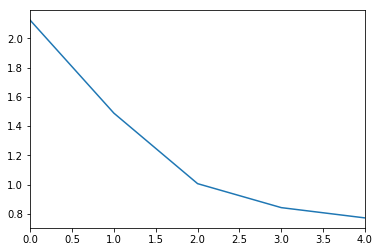

In [21]:
# Make a plot for the loss

hist['loss'].plot()

In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [27]:
# Evaluate the model

loss,acc,mae = model.evaluate(test_images[...,np.newaxis],test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [31]:
loss, acc, mae

(0.7662045613288879, 0.7319, 4.419997)

#### Make predictions from the model

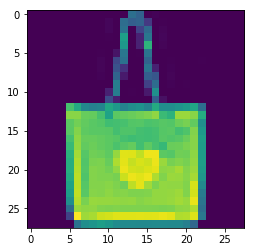

Label: Bag prediction:Bag


In [63]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]} prediction:{labels[np.argmax(model.predict(test_image.reshape((-1, 28, 28,1))))]}")

In [64]:
# Get the model predictions

labels[np.argmax(model.predict(test_image.reshape((1, 28, 28,1))))]

'Bag'

In [66]:
labels[np.argmax(model.predict(test_image[np.newaxis,...,np.newaxis]))]

'Bag'